In [1]:
import numpy as np
from random import randint
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

In [3]:
def find_hit(n, ls):
    return True if n in ls else False

In [4]:
def build_fig(indx, pos, color, one, two):
    X_i = np.array(X_test[indx]).reshape(50, 37)
    t = targets[y_test[indx]]
    p = targets[y_pred[indx]]
    ax = fig.add_subplot(pos)
    image = ax.imshow(X_i,  cmap='bone')
    ax.set_axis_off()
    ax.set_title(t)
    ax.text(one, two, p, color=color,bbox=dict(facecolor='white'))

In [5]:
def chk_acc(rnds):
    logic = [1 if y_test[row] == y_pred[row] else 0
             for row in rnds]
    colors = ['g' if row == 1 else 'r' for row in logic]
    return colors

In [6]:
X = np.load('data/X_faces.npy')
y = np.load('data/y_faces.npy')
images = np.load('data/faces_images.npy')
targets = np.load('data/faces_targets.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
pca = PCA(n_components=0.95, whiten=True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
pca_name = pca.__class__.__name__

In [8]:
svm = SVC(kernel='rbf', class_weight='balanced',gamma='scale', random_state=0)
svm_name = svm.__class__.__name__
svm.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
y_pred = svm.predict(X_test_pca)
misses = find_misses(y_test, y_pred)

In [10]:
miss = misses[0]
miss

0

In [13]:
hit = 1
X_hit = np.array(X_test[hit]).reshape(50, 37)
y_test_hit = targets[y_test[hit]]
y_pred_hit = targets[y_pred[hit]]
X_miss = np.array(X_test[miss]).reshape(50, 37)
y_test_miss = targets[y_test[miss]]
y_pred_miss = targets[y_pred[miss]]

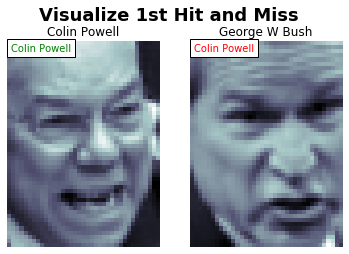

In [17]:
fig = plt.figure('1st Hit and Miss')
fig.suptitle('Visualize 1st Hit and Miss',fontsize=18, fontweight='bold')
build_fig(hit, 121, 'g', 0.4, 1.9)
build_fig(miss, 122, 'r', 0.4, 1.9)
rnd_ints = [randint(0, y_test.shape[0]-1)for row in range(4)]
colors = chk_acc(rnd_ints)


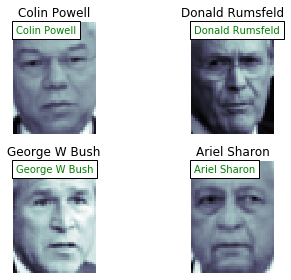

In [18]:
fig = plt.figure('Four Random Predictions')
build_fig(rnd_ints[0], 221, colors[0], .9, 4.45)
build_fig(rnd_ints[1], 222, colors[1], .9, 4.45)
build_fig(rnd_ints[2], 223, colors[2], .9, 4.45)
build_fig(rnd_ints[3], 224, colors[3], .9, 4.45)
plt.tight_layout()